# Unsupervised Machine Learning - Clustering

1. Importing libraries and datasets

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path_name = r'/Users/geetika/Documents/Python/Global Data on Sustainable Energy'

In [4]:
df = pd.read_pickle(os.path.join(path_name, '02_Data', 'Prepared Data', 'GDSE_prepared.pkl'))

In [5]:
pd.options.display.max_columns = None

In [6]:
df.head()

,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,gdp_based_zoning
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,Not enough data
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,Not enough data
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953,Low GDP zone
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953,Low GDP zone
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953,Low GDP zone


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 22 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

2. Data Wrangling

In [8]:
df_de = df[df['Country'] == 'Germany']

In [9]:
df_de

,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,gdp_based_zoning
1282,Germany,2000,100.0,100.0,NaN,NaN,3.70,367.22,169.61,35.47,35.834354,48903.700,4.00,830280.0000,2.887112,2.912503,23635.92922,240,357022.0,51.165691,10.451526,High GDP zone
1283,Germany,2001,100.0,100.0,NaN,NaN,3.90,372.69,171.30,37.90,35.951813,49841.387,4.05,847680.0000,2.941168,1.681468,23607.88286,240,357022.0,51.165691,10.451526,High GDP zone
1284,Germany,2002,100.0,100.0,NaN,NaN,4.41,372.64,164.84,44.48,35.968105,49257.790,3.97,833380.0049,3.538632,-0.197974,25077.72908,240,357022.0,51.165691,10.451526,High GDP zone
1285,Germany,2003,100.0,100.0,NaN,NaN,5.44,390.81,165.06,46.67,35.139576,49300.902,3.99,836789.9780,3.641990,-0.700117,30243.57653,240,357022.0,51.165691,10.451526,High GDP zone
1286,Germany,2004,100.0,100.0,NaN,NaN,6.34,385.24,167.07,57.97,36.874874,49342.406,3.97,821070.0073,4.516598,1.175088,34044.05363,240,357022.0,51.165691,10.451526,High GDP zone
1287,Germany,2005,100.0,100.0,NaN,NaN,7.28,386.96,163.05,63.40,36.916584,48793.566,3.92,802380.0049,5.208419,0.731707,34507.36881,240,357022.0,51.165691,10.451526,High GDP zone
1288,Germany,2006,100.0,100.0,NaN,NaN,8.59,390.03,167.27,72.51,38.071800,50043.030,3.89,814409.9731,6.026305,3.816442,36323.44774,240,357022.0,51.165691,10.451526,High GDP zone
1289,Germany,2007,100.0,100.0,NaN,NaN,10.47,402.40,140.53,89.38,36.360330,47958.130,3.58,783799.9878,7.653833,2.976455,41587.21290,240,357022.0,51.165691,10.451526,High GDP zone
1290,Germany,2008,100.0,100.0,NaN,NaN,10.25,390.43,148.49,94.28,38.340176,48445.984,3.59,789690.0024,7.817628,0.959879,45427.15168,240,357022.0,51.165691,10.451526,High GDP zone
1291,Germany,2009,100.0,100.0,NaN,NaN,10.72,358.07,134.93,95.94,39.200935,45436.277,3.56,734809.9976,8.454280,-5.693836,41485.90165,240,357022.0,51.165691,10.451526,High GDP zone


In [10]:
df_de.shape

(21, 22)

In [11]:
df_de.rename(columns = {'Value_co2_emissions_kt_by_country':'Avg_CO2_emissions'}, inplace = True)

In [57]:
columns = ['Year', 'Avg_CO2_emissions']
df_de1 = df_de[columns]

In [58]:
df_de1.columns

Index(['Year', 'Avg_CO2_emissions'], dtype='object')

In [59]:
df_de1 = df_de1.set_index('Year')

In [60]:
df_de1.columns

Index(['Avg_CO2_emissions'], dtype='object')

In [61]:
type(df_de1)

pandas.core.frame.DataFrame

3. Plotting the data using Matplotlib

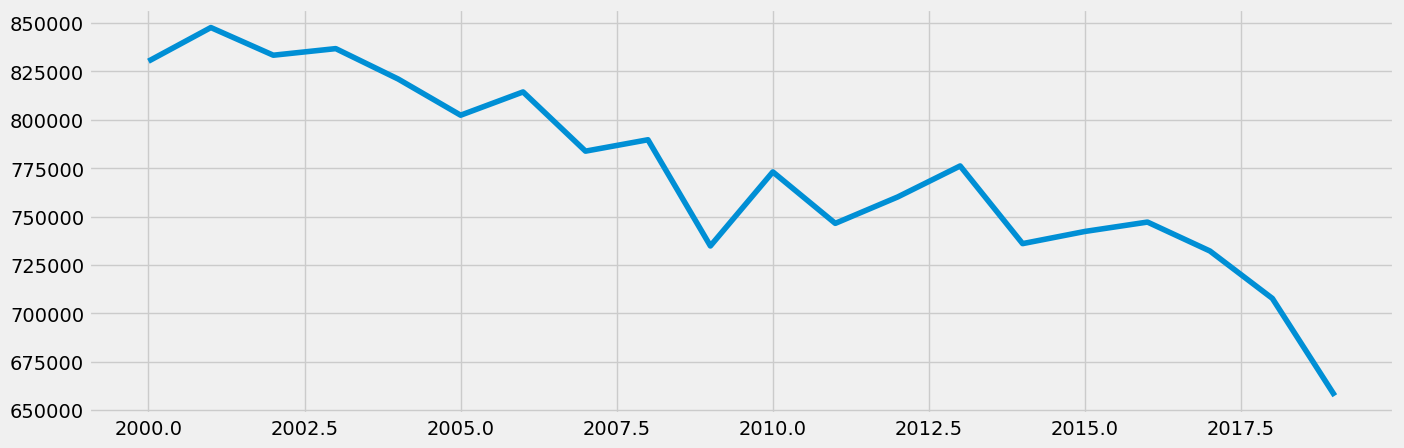

In [62]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_de1)

4. 

In [63]:
df_de1.dropna(inplace = True)
df_de1 = df_de1.reset_index()
df_de1.head()

,Year,Avg_CO2_emissions
0,2000,830280.0000
1,2001,847680.0000
2,2002,833380.0049
3,2003,836789.9780
4,2004,821070.0073


In [64]:
df_de1['Date'] = df_de1['Year'].astype(str) + '-01-01'
df_de1['datetime'] = pd.to_datetime(df_de1['Date']) # Create a datetime column from "Date.""
df_de1.drop(['Year'], axis=1, inplace=True) # Drop the "Date" column.
df_de1.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_de2 = df_de1.set_index('datetime')
df_de2.head()

,Avg_CO2_emissions
datetime,
2000-01-01,830280.0000
2001-01-01,847680.0000
2002-01-01,833380.0049
2003-01-01,836789.9780
2004-01-01,821070.0073


In [65]:
dups = df_de2.duplicated()
dups.sum()

0

In [66]:
df_de2.head()

,Avg_CO2_emissions
datetime,
2000-01-01,830280.0000
2001-01-01,847680.0000
2002-01-01,833380.0049
2003-01-01,836789.9780
2004-01-01,821070.0073


In [67]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_de2, model='additive')

In [68]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

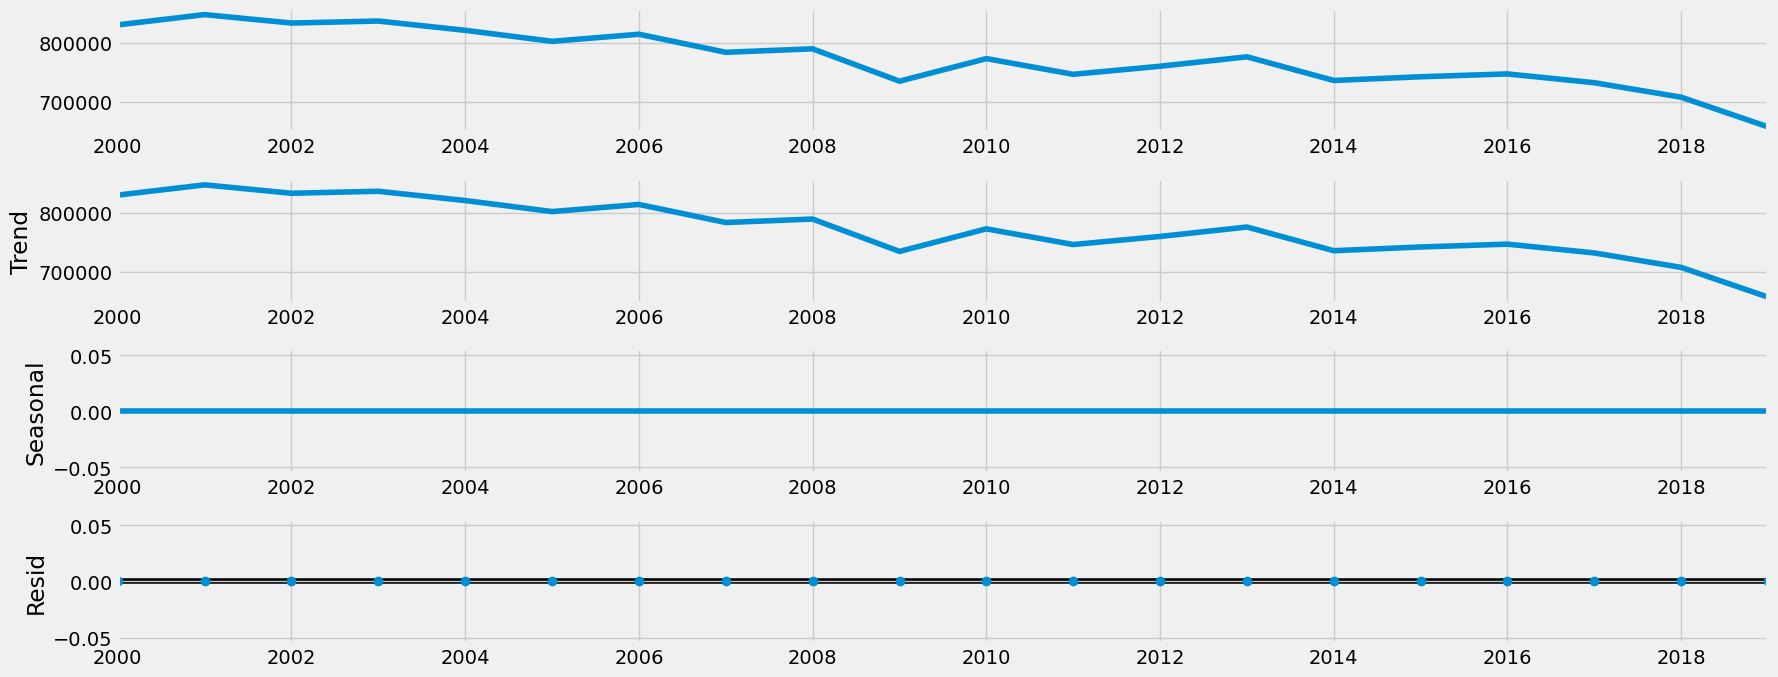

In [69]:
decomposition.plot()
plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_de2['Avg_CO2_emissions'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.050196
p-value                         0.954179
Number of Lags Used             0.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


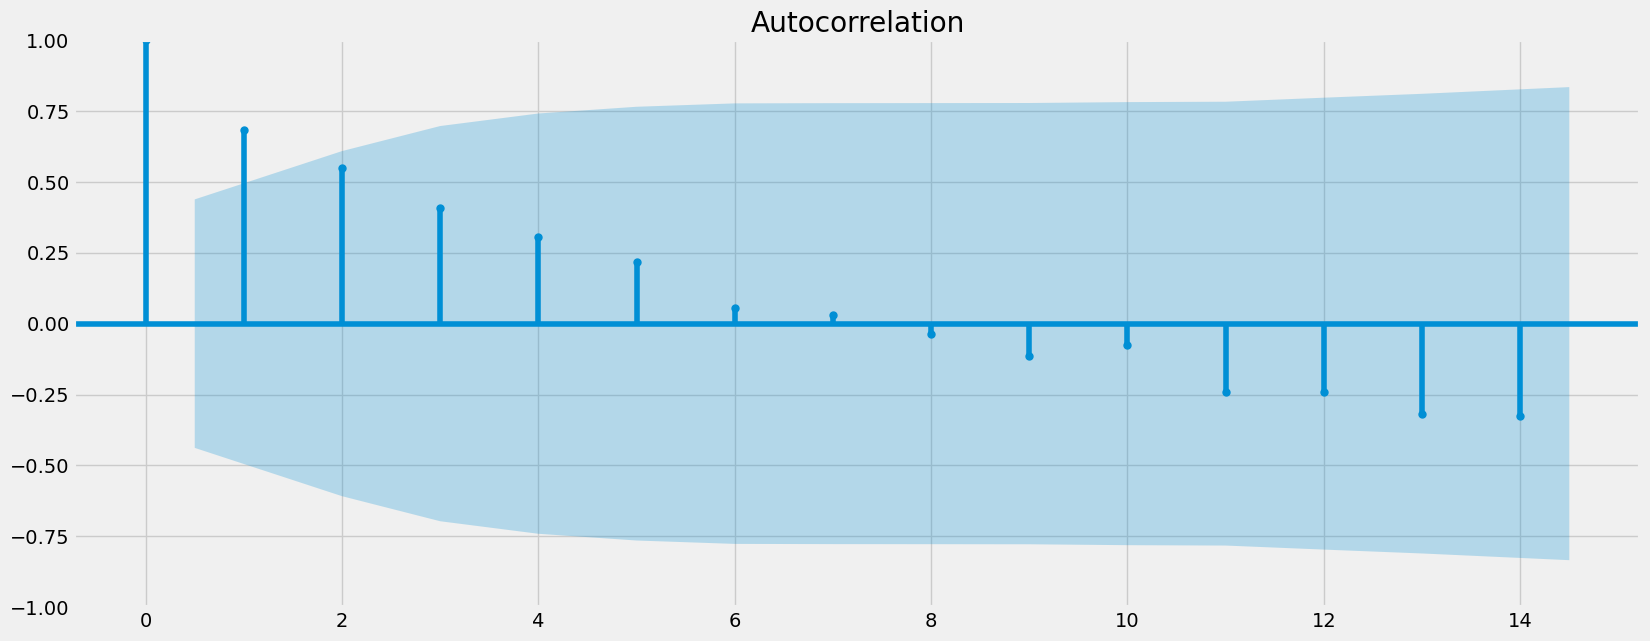

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_de2)
plt.show()

In [73]:
df_de2_diff = df_de2 - df_de2.shift(1) 

In [74]:
df_de2_diff.dropna(inplace = True)

In [75]:
df_de2_diff.head()

,Avg_CO2_emissions
datetime,
2001-01-01,17400.0000
2002-01-01,-14299.9951
2003-01-01,3409.9731
2004-01-01,-15719.9707
2005-01-01,-18690.0024


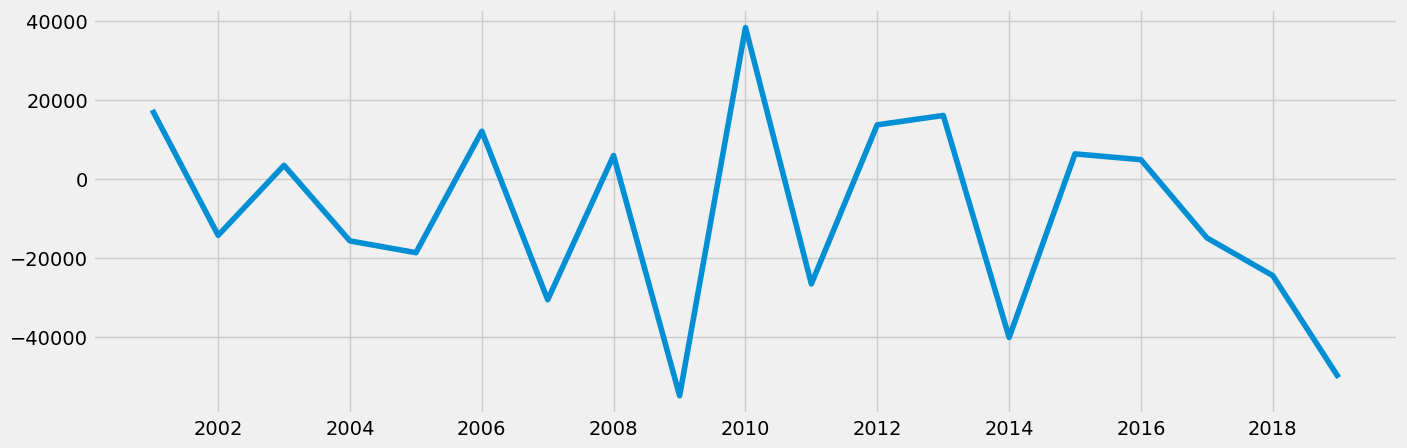

In [76]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_de2_diff)

In [77]:
dickey_fuller(df_de2_diff)  # Test statistic smaller than critical value and p value below 0.05

Dickey-Fuller Stationarity test:
Test Statistic                -6.723759e+00
p-value                        3.430736e-09
Number of Lags Used            0.000000e+00
Number of Observations Used    1.800000e+01
Critical Value (1%)           -3.859073e+00
Critical Value (5%)           -3.042046e+00
Critical Value (10%)          -2.660906e+00
dtype: float64


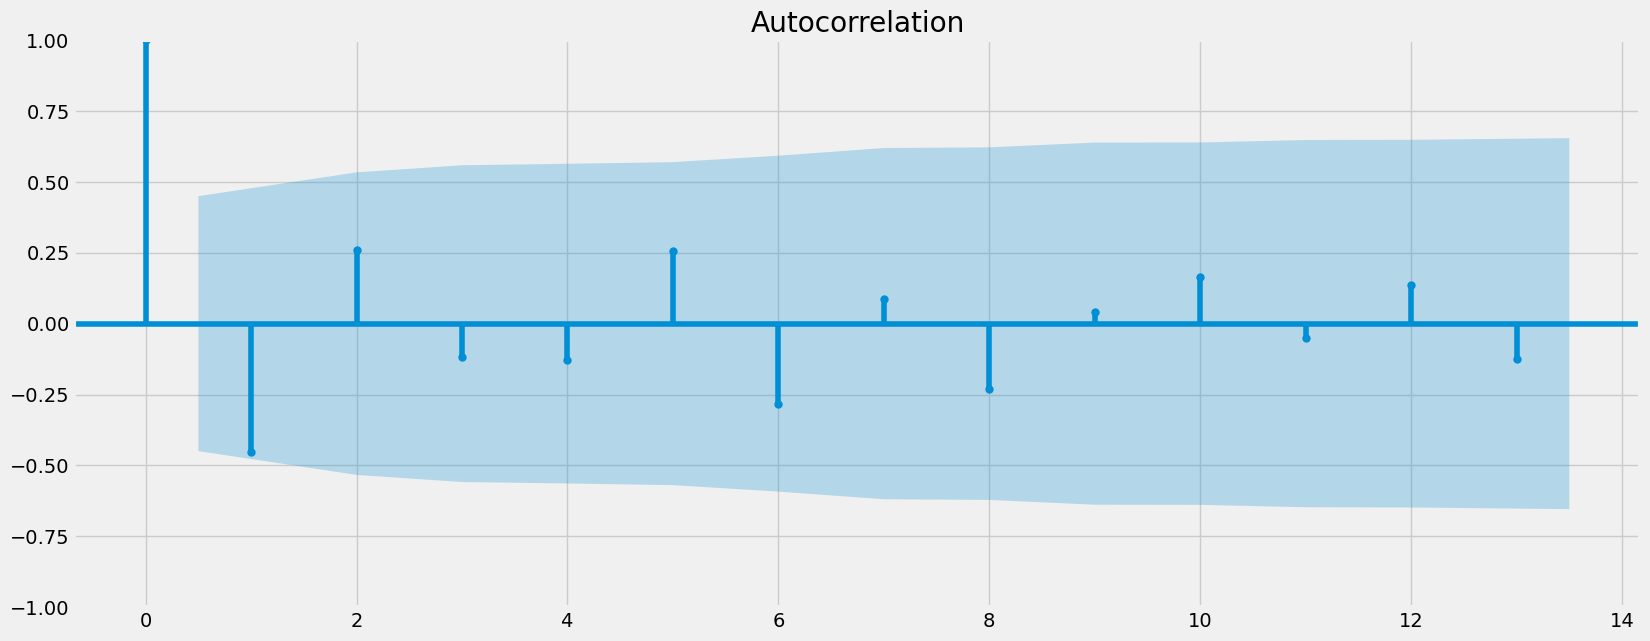

In [78]:
plot_acf(df_de2_diff) # Autocorrelation better than before.
plt.show()